In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
os.getcwd()

'/home/shanks/data-science/PyTorchPractice/CNN/Image Classification'

In [2]:
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [3]:
batch_size = 4
trainset = torchvision.datasets.ImageFolder(root='Data/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.ImageFolder(root='Data/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)
classes = ['Positive', 'Negative']

Positive Negative 
Negative Negative


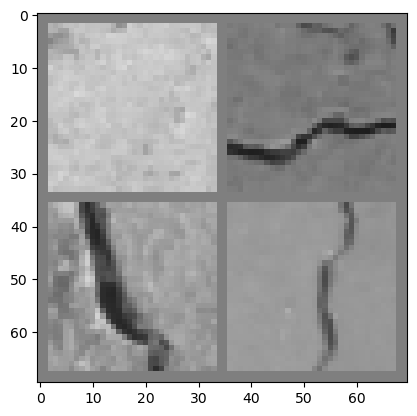

In [4]:
def imshow(img, lab):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    print(classes[lab[0]], classes[lab[1]],'\n'+ classes[lab[2]], classes[lab[3]])
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images, nrow=2), labels)

In [5]:
class ImageClassificationNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [6]:
model = ImageClassificationNet()      
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.8)

In [7]:
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = loss_fn(outputs, labels.reshape(-1, 1).float())
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f'Epoch {epoch}/{NUM_EPOCHS}, Step {i+1}/{len(trainloader)},' f'Loss: {loss.item():.4f}')

Epoch 0/10, Step 1/250,Loss: 0.6971
Epoch 0/10, Step 101/250,Loss: 0.6966
Epoch 0/10, Step 201/250,Loss: 0.6913
Epoch 1/10, Step 1/250,Loss: 0.6922
Epoch 1/10, Step 101/250,Loss: 0.6879
Epoch 1/10, Step 201/250,Loss: 0.6884
Epoch 2/10, Step 1/250,Loss: 0.6868
Epoch 2/10, Step 101/250,Loss: 0.6805
Epoch 2/10, Step 201/250,Loss: 0.6888
Epoch 3/10, Step 1/250,Loss: 0.6869
Epoch 3/10, Step 101/250,Loss: 0.6862
Epoch 3/10, Step 201/250,Loss: 0.6733
Epoch 4/10, Step 1/250,Loss: 0.6826
Epoch 4/10, Step 101/250,Loss: 0.6752
Epoch 4/10, Step 201/250,Loss: 0.6378
Epoch 5/10, Step 1/250,Loss: 0.6860
Epoch 5/10, Step 101/250,Loss: 0.6565
Epoch 5/10, Step 201/250,Loss: 0.6676
Epoch 6/10, Step 1/250,Loss: 0.6716
Epoch 6/10, Step 101/250,Loss: 0.5213
Epoch 6/10, Step 201/250,Loss: 0.4587
Epoch 7/10, Step 1/250,Loss: 0.5055
Epoch 7/10, Step 101/250,Loss: 0.2478
Epoch 7/10, Step 201/250,Loss: 0.0464
Epoch 8/10, Step 1/250,Loss: 1.1898
Epoch 8/10, Step 101/250,Loss: 0.0914
Epoch 8/10, Step 201/250,Loss:

In [8]:
y_test = []
y_test_pred = []
for i, data in enumerate(testloader):
    inputs, y_test_temp = data
    with torch.no_grad():
        y_test_hat_temp = model(inputs).round()
    
    y_test.extend(y_test_temp.numpy())
    y_test_pred.extend(y_test_hat_temp.numpy())

In [9]:
acc = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {acc*100: .2f}%')

Accuracy:  86.33%
